In [18]:
!pip install tensorflow
!pip install keras
!pip install torch
!pip install xgboost
!pip install torch torchvision torchaudio
!pip install seaborn
!pip install numpy pandas scikit-learn tensorflow
!pip install matplotlib h5py


# ChatGPT - https://chat.openai.com/c/c0887eb0-ba26-4913-81d9-c5bd3ab6ebfa

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the data
file_path = r'C:\Users\JackMcCarthy\Downloads\Feature_Engineering\raw_data_100%.csv'  # Use raw string for Windows paths
data = pd.read_csv(file_path)

# Drop columns with a high percentage of missing values
threshold = 0.5  # threshold for dropping columns with too many missing values
data = data.dropna(thresh=threshold*data.shape[0], axis=1)

# Split the data based on 'seasonyear'
train_data = data[data['seasonyear'].between(2014, 2018)]
validation_data = data[data['seasonyear'].between(2019, 2020)]
test_data = data[data['seasonyear'] == 2021]

# Separate target from predictors
y_train = train_data.lapcount
X_train = train_data.drop(['lapcount'], axis=1)
y_valid = validation_data.lapcount
X_valid = validation_data.drop(['lapcount'], axis=1)

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

# If you want to test on the test set
y_test = test_data.lapcount
X_test = test_data.drop(['lapcount'], axis=1)
test_preds = my_pipeline.predict(X_test)
test_score = mean_absolute_error(y_test, test_preds)
print('Test MAE:', test_score)


MAE: 6.393150697461698
Test MAE: 5.4840588517511595


Epoch 1/75
7266/7266 [==============================] - 158s 19ms/step - loss: 2377.5618 - mean_absolute_error: 24.6766 - val_loss: 1022.1904 - val_mean_absolute_error: 19.9790
Epoch 2/75
7266/7266 [==============================] - 131s 18ms/step - loss: 24.4097 - mean_absolute_error: 2.3037 - val_loss: 1152.4209 - val_mean_absolute_error: 19.9219
Epoch 3/75
7266/7266 [==============================] - 3894s 536ms/step - loss: 4.2717 - mean_absolute_error: 1.4521 - val_loss: 1144.6466 - val_mean_absolute_error: 19.1883
Epoch 4/75
7266/7266 [==============================] - 111s 15ms/step - loss: 2.9333 - mean_absolute_error: 1.2324 - val_loss: 1146.4919 - val_mean_absolute_error: 19.1753
Epoch 5/75
7266/7266 [==============================] - 116s 16ms/step - loss: 2.4111 - mean_absolute_error: 1.1307 - val_loss: 1128.6399 - val_mean_absolute_error: 19.3887
Epoch 6/75
7266/7266 [==============================] - 9679s 1s/step - loss: 2.0168 - mean_absolute_error: 1.0392 - val_loss: 1

7266/7266 [==============================] - 45s 6ms/step - loss: 0.3968 - mean_absolute_error: 0.4587 - val_loss: 836.2119 - val_mean_absolute_error: 15.2589
Epoch 49/75
7266/7266 [==============================] - 46s 6ms/step - loss: 0.3932 - mean_absolute_error: 0.4558 - val_loss: 831.1573 - val_mean_absolute_error: 15.1250
Epoch 50/75
7266/7266 [==============================] - 55s 8ms/step - loss: 0.3799 - mean_absolute_error: 0.4507 - val_loss: 830.8486 - val_mean_absolute_error: 15.1907
Epoch 51/75
7266/7266 [==============================] - 46s 6ms/step - loss: 0.3804 - mean_absolute_error: 0.4492 - val_loss: 830.6993 - val_mean_absolute_error: 15.2495
Epoch 52/75
7266/7266 [==============================] - 47s 7ms/step - loss: 0.3763 - mean_absolute_error: 0.4476 - val_loss: 824.6080 - val_mean_absolute_error: 15.0646
Epoch 53/75
7266/7266 [==============================] - 46s 6ms/step - loss: 0.3740 - mean_absolute_error: 0.4450 - val_loss: 828.4606 - val_mean_absolute_e

C:\Users\JackMcCarthy\Downloads\Anaconda_and_Pycharm\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


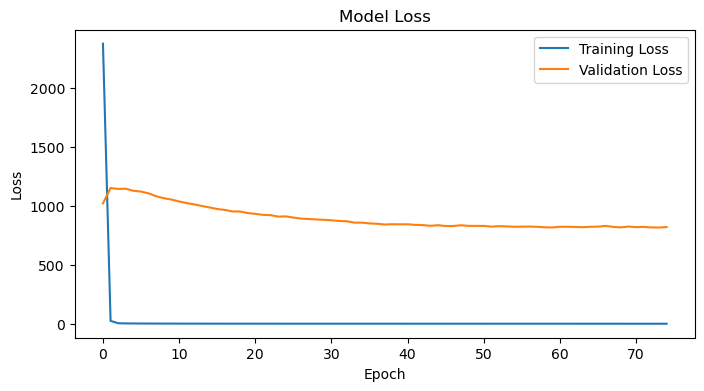

1368/1368 [==============================] - 7s 5ms/step - loss: 337.5025 - mean_absolute_error: 10.2425


[337.5025329589844, 10.242467880249023]

In [19]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.metrics import MeanAbsoluteError

# Load the data
file_path = 'C:/Users/JackMcCarthy/Downloads/Feature_Engineering/raw_data_100%.csv'
data = pd.read_csv(file_path)

# Ensure 'lapcount' is in the data
if 'lapcount' not in data.columns:
    raise KeyError("Column 'lapcount' not found in the dataframe.")

# Drop columns with a high percentage of missing values
threshold = 0.5
data = data.dropna(thresh=threshold*data.shape[0], axis=1)

# Split the data based on 'seasonyear'
train_data = data[data['seasonyear'].between(2014, 2018)]
validation_data = data[data['seasonyear'].between(2019, 2020)]
test_data = data[data['seasonyear'] == 2021]

# Separate target from predictors
y_train = train_data.pop('lapcount')
X_train = train_data
y_valid = validation_data.pop('lapcount')
X_valid = validation_data

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())  # Scaling data between 0 and 1
])

# Preprocessing for categorical data: impute missing values and one hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing and convert to dense array
X_train = preprocessor.fit_transform(X_train).toarray()
X_valid = preprocessor.transform(X_valid).toarray()

# Reshape the input data to add a time step dimension
time_steps = 1  # Each row is considered a separate time step
X_train = X_train.reshape((X_train.shape[0], time_steps, -1))
X_valid = X_valid.reshape((X_valid.shape[0], time_steps, -1))

# Model definition
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    GRU(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model with 75 epochs and save the history
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_valid, y_valid))

# Define the directory where the model should be saved
directory = 'C:/Users/JackMcCarthy/OneDrive - Zapata Computing/Desktop/Research/Models'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the trained model
model_save_path = os.path.join(directory, 'trained_model.h5')
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Prepare test data and evaluate the model
test_data_processed = preprocessor.transform(test_data.drop('lapcount', axis=1)).toarray()
test_data_processed = test_data_processed.reshape((test_data_processed.shape[0], time_steps, -1))
test_labels = test_data['lapcount']
model.evaluate(test_data_processed, test_labels)

# To load the model later
# loaded_model = load_model(model_save_path)


# GRU using batch training using trackid

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.metrics import MeanAbsoluteError

# Load the data
file_path = 'C:/Users/JackMcCarthy/Downloads/Feature_Engineering/raw_data_100%.csv'
data = pd.read_csv(file_path)

# Ensure 'lapcount' is in the data
if 'lapcount' not in data.columns:
    raise KeyError("Column 'lapcount' not found in the dataframe.")

# Drop columns with a high percentage of missing values
threshold = 0.5
data = data.dropna(thresh=threshold*data.shape[0], axis=1)

# Split the data based on 'seasonyear'
train_data = data[data['seasonyear'].between(2014, 2018)]
validation_data = data[data['seasonyear'].between(2019, 2020)]
test_data = data[data['seasonyear'] == 2021]

# Separate target from predictors
y_train = train_data.pop('lapcount')
X_train = train_data
y_valid = validation_data.pop('lapcount')
X_valid = validation_data

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())  # Scaling data between 0 and 1
])

# Preprocessing for categorical data: impute missing values and one hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing and convert to dense array
X_train = preprocessor.fit_transform(X_train).toarray()
X_valid = preprocessor.transform(X_valid).toarray()

# Reshape the input data to add a time step dimension
time_steps = 1  # Each row is considered a separate time step
X_train = X_train.reshape((X_train.shape[0], time_steps, -1))
X_valid = X_valid.reshape((X_valid.shape[0], time_steps, -1))

# Model definition
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    GRU(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model with 75 epochs
model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_valid, y_valid))

# Prepare test data and evaluate the model
test_data_processed = preprocessor.transform(test_data.drop('lapcount', axis=1)).toarray()
test_data_processed = test_data_processed.reshape((test_data_processed.shape[0], time_steps, -1))
test_labels = test_data['lapcount']
model.evaluate(test_data_processed, test_labels)


ValueError: A given column is not a column of the dataframe

# GRU using dataframe

In [4]:
import pandas as pd

# Load the data from the CSV file
data_path = "C:\\Users\\JackMcCarthy\\Downloads\\Feature_Engineering\\raw_data_100%.csv"  # Update this path as needed
data = pd.read_csv(data_path)

# Assuming 'laptime' is a column in your CSV and all other required columns are present
# Selecting the specified columns for features
feature_columns = [
    'minqualtime', 'qualtime', 'length', 'laps', 'trackid', 'trackstate',
    'flagstate', 'pit', 'notirechanges', 'lapssincetc', 'pitlanetime',
    'tirechangestate', 'lapsinyellow', 'relspeedbehind', 'relspeedinfront',
    'lapcount', 'carno'
]

# Filter the DataFrame to only include the specified features and the target variable
data = data[feature_columns + ['laptime']]

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on non-numeric columns
data = pd.get_dummies(data, columns=non_numeric_columns)

# Display the first few rows of the DataFrame
print(data.head())


   minqualtime  qualtime  length  laps  trackid  trackstate  flagstate    pit  \
0      62.1609   62.1609     1.8   110       23           1          1  False   
1      62.1609   62.2167     1.8     0       23           1          1  False   
2      62.1609   62.1637     1.8   110       23           1          1  False   
3      62.1609   62.3955     1.8   110       23           1          1  False   
4      62.1609   62.4454     1.8   110       23           1          1  False   

   notirechanges  lapssincetc  pitlanetime  tirechangestate  lapsinyellow  \
0              0            0          0.0            False             0   
1              0            0          0.0            False             0   
2              0            0          0.0            False             0   
3              0            0          0.0            False             0   
4              0            0          0.0            False             0   

   relspeedbehind  relspeedinfront  lapcount  carn

Epoch 1/50
7266/7266 - 28s - loss: 1261.1881 - mean_squared_error: 1261.1881 - val_loss: 2355.7217 - val_mean_squared_error: 2355.7217 - 28s/epoch - 4ms/step
Epoch 2/50
7266/7266 - 29s - loss: 1049.1155 - mean_squared_error: 1049.1155 - val_loss: 2558.2466 - val_mean_squared_error: 2558.2466 - 29s/epoch - 4ms/step
Epoch 3/50
7266/7266 - 23s - loss: 1028.8885 - mean_squared_error: 1028.8885 - val_loss: 2851.6494 - val_mean_squared_error: 2851.6494 - 23s/epoch - 3ms/step
Epoch 4/50
7266/7266 - 30s - loss: 1016.0681 - mean_squared_error: 1016.0681 - val_loss: 3163.4612 - val_mean_squared_error: 3163.4612 - 30s/epoch - 4ms/step
Epoch 5/50
7266/7266 - 25s - loss: 1003.3965 - mean_squared_error: 1003.3965 - val_loss: 3602.2546 - val_mean_squared_error: 3602.2546 - 25s/epoch - 3ms/step
Epoch 6/50
7266/7266 - 21s - loss: 990.8105 - mean_squared_error: 990.8105 - val_loss: 4102.8169 - val_mean_squared_error: 4102.8169 - 21s/epoch - 3ms/step
Epoch 7/50
7266/7266 - 22s - loss: 979.7187 - mean_squ

C:\Users\JackMcCarthy\Downloads\Anaconda_and_Pycharm\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


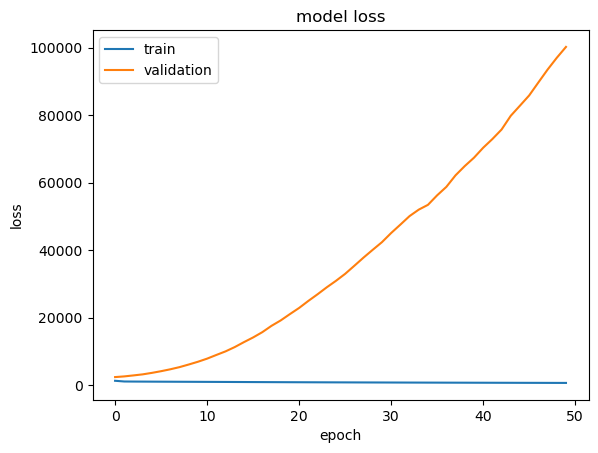

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.metrics import MeanSquaredError
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:\\Users\\JackMcCarthy\\Downloads\\Feature_Engineering\\raw_data_100%.csv")

# Define the features and target variable
features = [
    'minqualtime', 'qualtime', 'length', 'laps', 'trackid', 'trackstate',
    'flagstate', 'pit', 'notirechanges', 'lapssincetc', 'pitlanetime',
    'tirechangestate', 'lapsinyellow', 'relspeedbehind', 'relspeedinfront',
    'lapcount', 'carno', 'seasonyear'
]
target = 'laptime'  # Replace with actual target variable name

# Split the data based on 'seasonyear'
train_data = data[data['seasonyear'].between(2014, 2018)]
validation_data = data[data['seasonyear'].between(2019, 2020)]
test_data = data[data['seasonyear'] == 2021]

# Prepare the features and labels for train, validation and test sets
X_train = train_data[features].values
y_train = train_data[target].values
X_validation = validation_data[features].values
y_validation = validation_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# Reshape the features for GRU [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_validation = X_validation.reshape((X_validation.shape[0], 1, X_validation.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Scale the features (GRUs, like LSTMs, are sensitive to the scale of the input data)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_validation_scaled = scaler.transform(X_validation.reshape(-1, X_validation.shape[-1])).reshape(X_validation.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Define the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_validation_scaled, y_validation), verbose=2)

# Evaluate the model on the test set
loss, mean_squared_error = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test MSE: {mean_squared_error}")

# Save the model, if needed
model.save("gru_model.h5")

# Model metrics summary
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# Random Forest Regression Model for Lap Time Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Load the data
data = pd.read_csv("C:\\Users\\JackMcCarthy\\Downloads\\Feature_Engineering\\raw_data_100%.csv")


# Preprocess the data
# For demonstration, we'll just drop rows with missing values and convert categorical to numerical with pd.get_dummies
data_clean = data.dropna()
data_clean = pd.get_dummies(data_clean)

# Select the target variable
target = 'laptime'
X = data_clean.drop(target, axis=1)
y = data_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Feature correlation with the target variable
correlation_with_target = data_clean.corr()[target].sort_values(ascending=False)

# Convert the correlation series to a DataFrame
correlation_df = correlation_with_target.reset_index()
correlation_df.columns = ['Feature', 'CorrelationWithTarget']

# Export to CSV in the Downloads folder
output_file_path = r"C:\Users\JackMcCarthy\Downloads\Feature_Engineering\feature_correlation_with_target.csv"
correlation_df.to_csv(output_file_path, index=False)


print(f"CSV file saved to {output_file_path}")

# Print the head of the sorted correlation DataFrame
print(correlation_df.head())


# LSTM General Model

Epoch 1/50
9093/9093 - 35s - loss: 1703.6019 - mean_squared_error: 1703.6019 - val_loss: 1403.2462 - val_mean_squared_error: 1403.2462 - 35s/epoch - 4ms/step
Epoch 2/50
9093/9093 - 34s - loss: 1522.8059 - mean_squared_error: 1522.8059 - val_loss: 1382.8607 - val_mean_squared_error: 1382.8607 - 34s/epoch - 4ms/step
Epoch 3/50
9093/9093 - 34s - loss: 1509.4580 - mean_squared_error: 1509.4580 - val_loss: 1375.5476 - val_mean_squared_error: 1375.5476 - 34s/epoch - 4ms/step
Epoch 4/50
9093/9093 - 27s - loss: 1503.9271 - mean_squared_error: 1503.9271 - val_loss: 1374.0775 - val_mean_squared_error: 1374.0775 - 27s/epoch - 3ms/step
Epoch 5/50
9093/9093 - 32s - loss: 1500.0912 - mean_squared_error: 1500.0912 - val_loss: 1368.7512 - val_mean_squared_error: 1368.7512 - 32s/epoch - 3ms/step
Epoch 6/50
9093/9093 - 37s - loss: 1497.2091 - mean_squared_error: 1497.2091 - val_loss: 1366.0472 - val_mean_squared_error: 1366.0472 - 37s/epoch - 4ms/step
Epoch 7/50
9093/9093 - 35s - loss: 1495.3680 - mean_

C:\Users\JackMcCarthy\Downloads\Anaconda_and_Pycharm\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


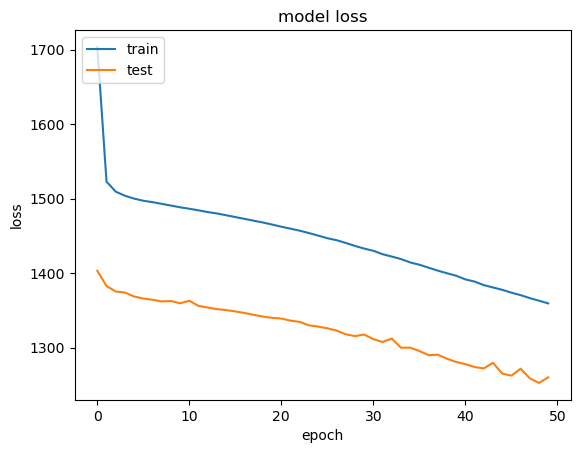

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import MeanSquaredError

# Load the data
data = pd.read_csv("C:\\Users\\JackMcCarthy\\Downloads\\Feature_Engineering\\GPT_selected_features.csv")

# Assuming 'laptime' is a column in your CSV
target = 'laptime'

# Prepare the features and labels
X = data.drop(target, axis=1).values
y = data[target].values

# Reshape the features for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (LSTMs are sensitive to the scale of the input data)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Evaluate the model
loss, mean_squared_error = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test MSE: {mean_squared_error}")

# Save the model, if needed
model.save("lstm_model.h5")

# Model metrics summary
print(history.history.keys())
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# GRU General Model

Epoch 1/50
9093/9093 - 40s - loss: 1691.6213 - mean_squared_error: 1691.6213 - val_loss: 1397.3616 - val_mean_squared_error: 1397.3616 - 40s/epoch - 4ms/step
Epoch 2/50
9093/9093 - 36s - loss: 1515.9349 - mean_squared_error: 1515.9349 - val_loss: 1378.9514 - val_mean_squared_error: 1378.9514 - 36s/epoch - 4ms/step
Epoch 3/50
9093/9093 - 33s - loss: 1506.9685 - mean_squared_error: 1506.9685 - val_loss: 1374.8538 - val_mean_squared_error: 1374.8538 - 33s/epoch - 4ms/step
Epoch 4/50
9093/9093 - 26s - loss: 1502.5560 - mean_squared_error: 1502.5560 - val_loss: 1369.2208 - val_mean_squared_error: 1369.2208 - 26s/epoch - 3ms/step
Epoch 5/50
9093/9093 - 31s - loss: 1499.3597 - mean_squared_error: 1499.3597 - val_loss: 1366.3347 - val_mean_squared_error: 1366.3347 - 31s/epoch - 3ms/step
Epoch 6/50
9093/9093 - 30s - loss: 1495.5941 - mean_squared_error: 1495.5941 - val_loss: 1368.6688 - val_mean_squared_error: 1368.6688 - 30s/epoch - 3ms/step
Epoch 7/50
9093/9093 - 31s - loss: 1492.5880 - mean_

C:\Users\JackMcCarthy\Downloads\Anaconda_and_Pycharm\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


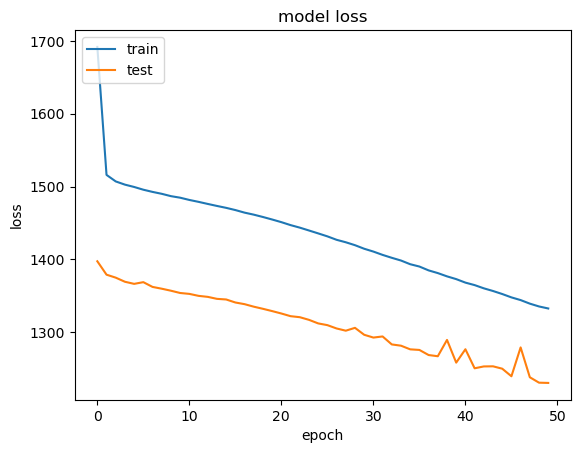

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense  # Import GRU instead of LSTM
from keras.metrics import MeanSquaredError

# Load the data
data = pd.read_csv("C:\\Users\\JackMcCarthy\\Downloads\\Feature_Engineering\\GPT_selected_features.csv")

# Assuming 'laptime' is a column in your CSV
target = 'laptime'

# Prepare the features and labels
X = data.drop(target, axis=1).values
y = data[target].values

# Reshape the features for GRU [samples, time_steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (GRUs, like LSTMs, are sensitive to the scale of the input data)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Define the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Evaluate the model
loss, mean_squared_error = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test MSE: {mean_squared_error}")

# Save the model, if needed
model.save("gru_model.h5")

# Model metrics summary
print(history.history.keys())
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# LSTM Car Specific Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import MeanSquaredError
import ipywidgets as widgets
from IPython.display import display

# Load the data
data = pd.read_csv("C:\\Users\\JackMcCarthy\\Downloads\\Feature_Engineering\\GPT_selected_features.csv")

# Create a dropdown to select the car number
carno_dropdown = widgets.Dropdown(
    options=data['carno'].unique(),
    description='Select Car No:',
    disabled=False,
)

# Display the dropdown
display(carno_dropdown)

# Callback function to train and evaluate the model based on the selected car number
def train_evaluate_model(carno):
    # Filter data for the selected car number
    car_data = data[data['carno'] == carno]
    
    # Assuming 'laptime' is a column in your CSV
    target = 'laptime'
    
    # Prepare the features and labels
    X = car_data.drop(target, axis=1).values
    y = car_data[target].values
    
    # Reshape the features for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], 1, X.shape[1]))
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features (LSTMs are sensitive to the scale of the input data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
    
    # Fit the model
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)
    
    # Evaluate the model
    loss, mean_squared_error = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    print(f"Test MSE for Car No {carno}: {mean_squared_error}")
    
    # Model metrics summary
    print(history.history.keys())
    # summarize history for loss
    import matplotlib.pyplot as plt
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Save the model, if needed
    model.save(f"lstm_model_car_{carno}.h5")

# Use the 'observe' method to bind a callback function that will execute when the dropdown value changes
carno_dropdown.observe(lambda change: train_evaluate_model(change.new), names='value')


Dropdown(description='Select Car No:', options=(14, 28, 10, 12, 9, 34, 98, 3, 8, 25, 20, 15, 17, 77, 19, 2, 11…

# GRU Car Specific Model

Dropdown(description='Select Car No:', options=(14, 28, 10, 12, 9, 34, 98, 3, 8, 25, 20, 15, 17, 77, 19, 2, 11…

Epoch 1/50
71/71 - 2s - loss: 4404.0596 - mean_squared_error: 4404.0596 - val_loss: 4385.8325 - val_mean_squared_error: 4385.8325 - 2s/epoch - 31ms/step
Epoch 2/50
71/71 - 0s - loss: 4012.3943 - mean_squared_error: 4012.3943 - val_loss: 3754.6423 - val_mean_squared_error: 3754.6423 - 196ms/epoch - 3ms/step
Epoch 3/50
71/71 - 0s - loss: 3222.9329 - mean_squared_error: 3222.9329 - val_loss: 2794.3440 - val_mean_squared_error: 2794.3440 - 340ms/epoch - 5ms/step
Epoch 4/50
71/71 - 0s - loss: 2323.2637 - mean_squared_error: 2323.2637 - val_loss: 1927.1709 - val_mean_squared_error: 1927.1709 - 336ms/epoch - 5ms/step
Epoch 5/50
71/71 - 0s - loss: 1671.4199 - mean_squared_error: 1671.4199 - val_loss: 1405.0431 - val_mean_squared_error: 1405.0431 - 349ms/epoch - 5ms/step
Epoch 6/50
71/71 - 0s - loss: 1342.9253 - mean_squared_error: 1342.9253 - val_loss: 1189.7770 - val_mean_squared_error: 1189.7770 - 282ms/epoch - 4ms/step
Epoch 7/50
71/71 - 0s - loss: 1229.5970 - mean_squared_error: 1229.5970 

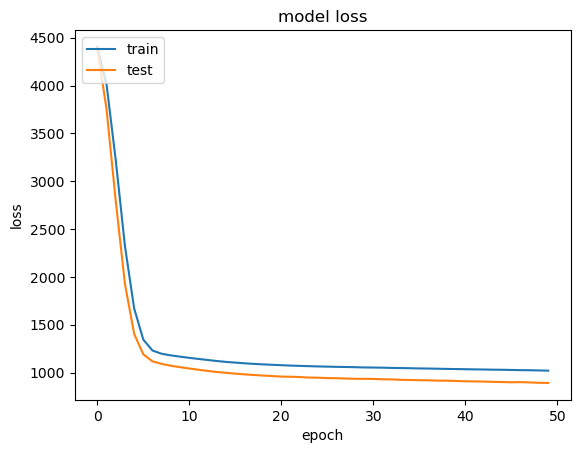

C:\Users\JackMcCarthy\Downloads\Anaconda_and_Pycharm\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense  # Changed LSTM to GRU here
from keras.metrics import MeanSquaredError
import ipywidgets as widgets
from IPython.display import display

# Load the data
data = pd.read_csv("C:\\Users\\JackMcCarthy\\Downloads\\Feature_Engineering\\GPT_selected_features.csv")

# Create a dropdown to select the car number
carno_dropdown = widgets.Dropdown(
    options=data['carno'].unique(),
    description='Select Car No:',
    disabled=False,
)

# Display the dropdown
display(carno_dropdown)

# Callback function to train and evaluate the model based on the selected car number
def train_evaluate_model(carno):
    # Filter data for the selected car number
    car_data = data[data['carno'] == carno]
    
    # Assuming 'laptime' is a column in your CSV
    target = 'laptime'
    
    # Prepare the features and labels
    X = car_data.drop(target, axis=1).values
    y = car_data[target].values
    
    # Reshape the features for GRU [samples, time_steps, features]
    X = X.reshape((X.shape[0], 1, X.shape[1]))
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features (GRUs, like LSTMs, are sensitive to the scale of the input data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    
    # Define the GRU model
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))  # Changed LSTM to GRU here
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
    
    # Fit the model
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)
    
    # Evaluate the model
    loss, mean_squared_error = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    print(f"Test MSE for Car No {carno}: {mean_squared_error}")
    
    # Model metrics summary
    print(history.history.keys())
    # summarize history for loss
    import matplotlib.pyplot as plt
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Save the model, if needed
    model.save(f"gru_model_car_{carno}.h5")  # Changed lstm to gru in the file name

# Use the 'observe' method to bind a callback function that will execute when the dropdown value changes
carno_dropdown.observe(lambda change: train_evaluate_model(change.new), names='value')
